# Different Configuration Using Lagorce Kmeans

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from HOTS.Monitor import GenerateAM, DisplayAM
from HOTS.Event import Event, SimpleAlphabet
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer, FilterNHBD
from HOTS.Monitor import DisplayImage, DisplaySurface3D, DisplaySurface2D, DisplayConvergence
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.KmeansCluster import KmeansLagorce

# 1. Defining Common parameter

In [3]:
tau = 0.02
R = 2
nb_cluster = [4,8,16]
ImageSize = (32,32)
DataPath = '../Data/ExtractedStabilized.mat'
LabelPath = '../Data/alphabet_label.pkl'

# 2. StepbyStep Training

In [4]:
'''
image_list = [1, 32, 19, 22, 29]
event0 = Event(ImageSize=(32,32),OutOnePolarity=True)

event0.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=image_list)

## Layer1

SpTe_Layer1= STS(tau=tau, R=R,verbose=0)
Surface_Layer1 = SpTe_Layer1.create(event = event0,kernel='linear')
event_filtered1, filt = SpTe_Layer1.FilterRecent(event = event0, threshold=2)
ClusterLayer1 = KmeansLagorce(nb_cluster = nb_cluster[0], to_record=True, verbose=1)
Prototype1 = ClusterLayer1.fit(SpTe_Layer1)
event2,_ = ClusterLayer1.predict(Surface=SpTe_Layer1.Surface,event = event_filtered1)
## Layer2
SpTe_Layer2= STS(tau=10*tau, R=2*R,verbose=0)
Surface_Layer2 = SpTe_Layer2.create(event = event2,kernel='linear')
ClusterLayer2 = KmeansLagorce(nb_cluster = nb_cluster[1], to_record=True, verbose=1)
Prototype2 = ClusterLayer2.fit(SpTe_Layer2)
event3,_ = ClusterLayer2.predict(Surface=SpTe_Layer2.Surface,event = event2)

## Layer3
SpTe_Layer3= STS(tau=10*10*tau, R=2*2*R,verbose=0)
Surface_Layer3 = SpTe_Layer3.create(event = event3,kernel='linear')
ClusterLayer3 = KmeansLagorce(nb_cluster = nb_cluster[2], to_record=True, verbose=1)
Prototype3 = ClusterLayer3.fit(SpTe_Layer3)
event4,_ = ClusterLayer3.predict(Surface=SpTe_Layer3.Surface,event = event3)
'''

"\nimage_list = [1, 32, 19, 22, 29]\nevent0 = Event(ImageSize=(32,32),OutOnePolarity=True)\n\nevent0.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=image_list)\n\n## Layer1\n\nSpTe_Layer1= STS(tau=tau, R=R,verbose=0)\nSurface_Layer1 = SpTe_Layer1.create(event = event0,kernel='linear')\nevent_filtered1, filt = SpTe_Layer1.FilterRecent(event = event0, threshold=2)\nClusterLayer1 = KmeansLagorce(nb_cluster = nb_cluster[0], to_record=True, verbose=1)\nPrototype1 = ClusterLayer1.fit(SpTe_Layer1)\nevent2,_ = ClusterLayer1.predict(Surface=SpTe_Layer1.Surface,event = event_filtered1)\n## Layer2\nSpTe_Layer2= STS(tau=10*tau, R=2*R,verbose=0)\nSurface_Layer2 = SpTe_Layer2.create(event = event2,kernel='linear')\nClusterLayer2 = KmeansLagorce(nb_cluster = nb_cluster[1], to_record=True, verbose=1)\nPrototype2 = ClusterLayer2.fit(SpTe_Layer2)\nevent3,_ = ClusterLayer2.predict(Surface=SpTe_Layer2.Surface,event = event2)\n\n## Layer3\nSpTe_Layer3= STS(tau=10*10*tau, R=2*2*R,verbose=0)\nSur

# 3. Experiment with one polarity in input  

## 3.1. Exp1 :  Lagorce Kmeans + Linear Kernel +  NoiseFilter(=2)  +  1 Polarity in Input + 3 Cycles

In [5]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path=DataPath, LabelPath=LabelPath,
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = True, verbose=0)

In [6]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path=DataPath, LabelPath=LabelPath,
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = True, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='linear')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='linear')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='linear')
Net = Network([L1,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,NbClusterList=nb_cluster,
                                                 to_record=True, NbCycle=3)
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)
    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_01_LagorceKmeans/Exp1_2017_11_17.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_01_LagorceKmeans/Exp1_2017_11_17.pkl')
    prediction, accuracy, method= Classif0.HistogramDistance(to_print=True)

battacha:87.5% ### normalized:85.0% ### euclidian:87.5% ### 


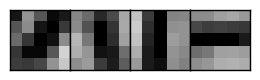

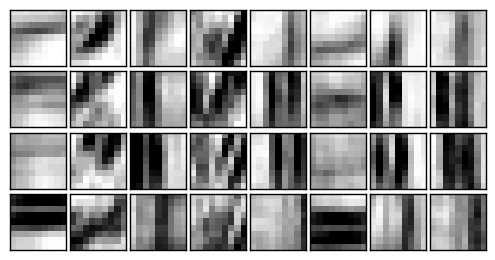

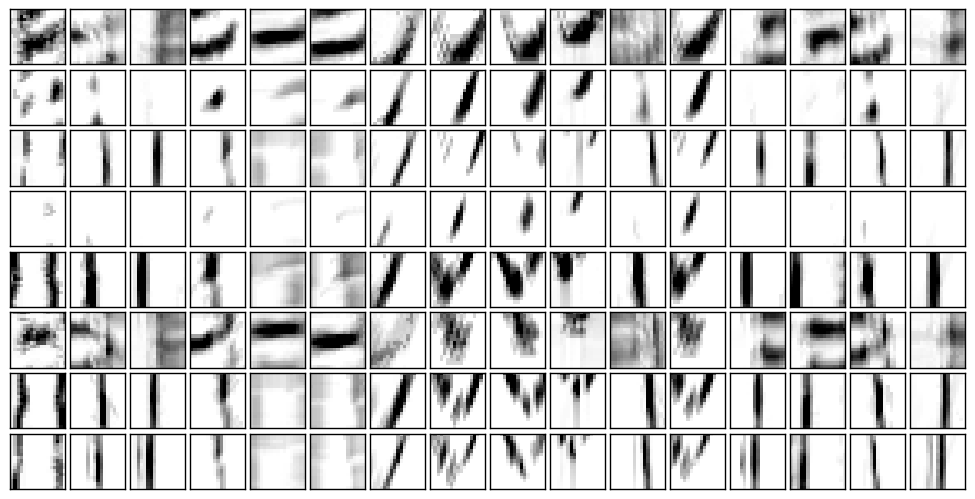

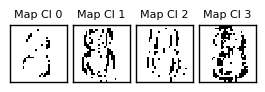

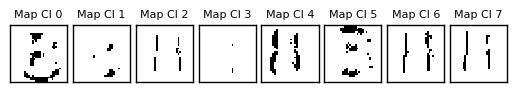

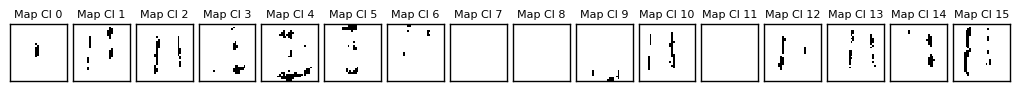

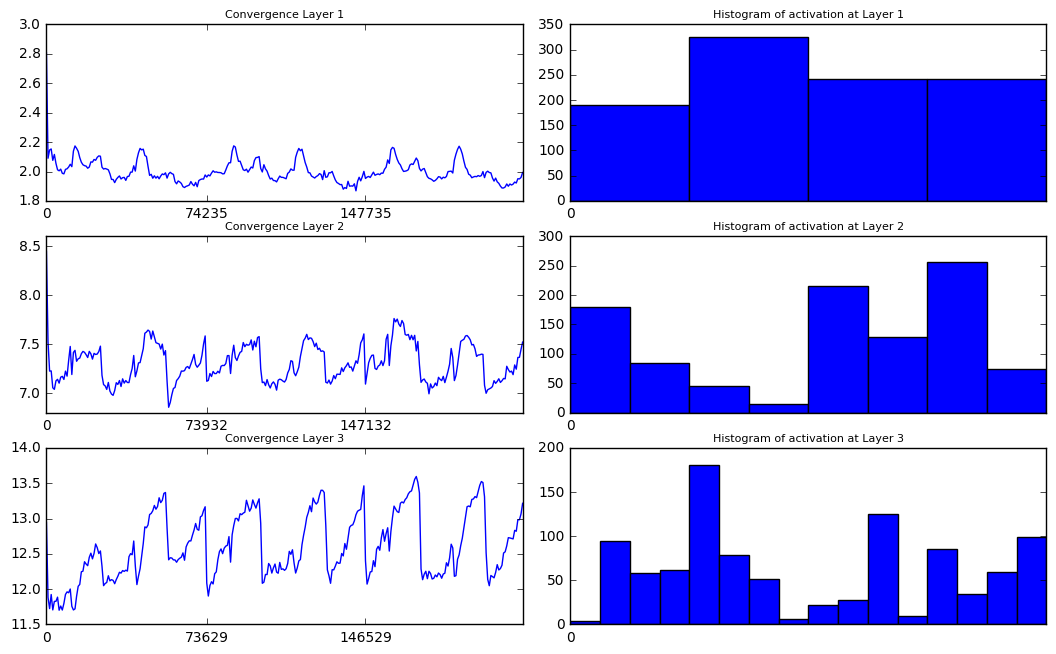

In [7]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=1)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=True)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0])
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1])
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2])
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer,to_display=['error','histo'])

## 3.2. Exp2 : Lagorce Kmeans + Exp Kernel + NoiseFilter(=2) +  1 Polarity in Input + 3 Cycles

In [8]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path=DataPath, LabelPath=LabelPath,
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = True, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='exponential')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='exponential')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='exponential')
Net = Network([L1,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,NbClusterList=nb_cluster,
                                                 to_record=True, NbCycle=3)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_01_LagorceKmeans/Exp2_2017_11_17.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_01_LagorceKmeans/Exp2_2017_11_17.pkl')
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:70.0% ### normalized:70.0% ### euclidian:70.0% ### 


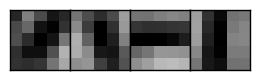

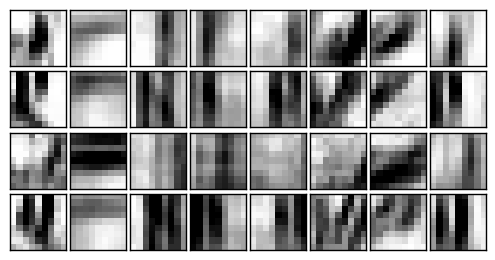

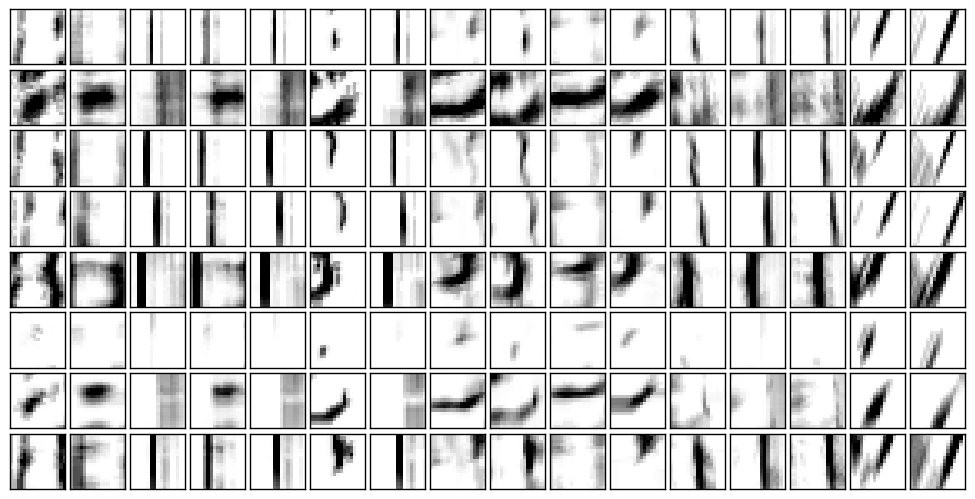

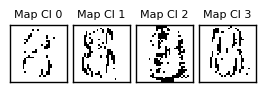

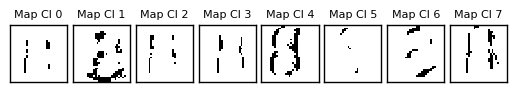

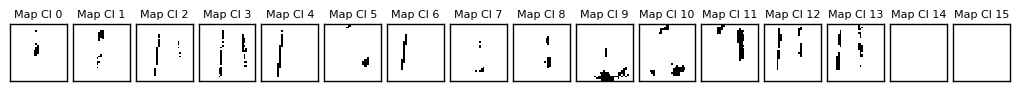

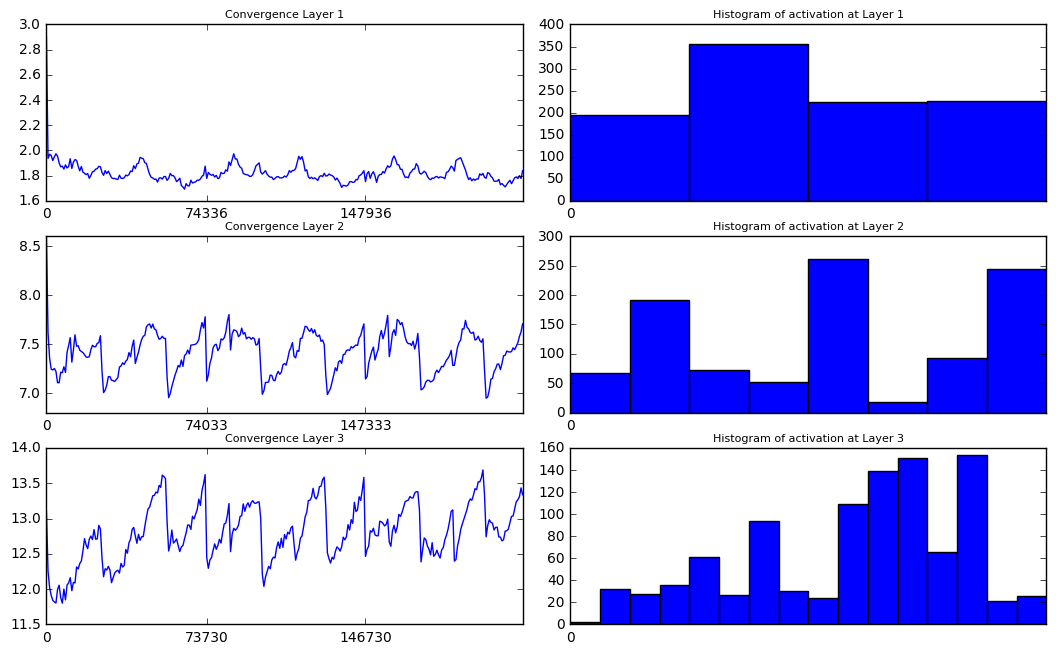

In [9]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=1)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=True)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0])
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1])
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2])
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer,to_display=['error','histo'])

# 4. Experiment with 2 polarity in Input 

## 4.1. Exp3 : Lagorce Kmeans + Linear Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [10]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                            Path=DataPath, LabelPath=LabelPath,
                                                            ClusteringData=[1, 32, 19, 22, 29],
                                                            OutOnePolarity = False, verbose=0)


## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='linear')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='linear')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='linear')
Net = Network([L1,L2,L3])


if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,NbClusterList=nb_cluster,
                                                 to_record=True, NbCycle=3)
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)
    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_01_LagorceKmeans/Exp3_2017_11_17.pkl')
else :
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_01_LagorceKmeans/Exp3_2017_11_17.pkl')
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:97.5% ### normalized:97.5% ### euclidian:97.5% ### 


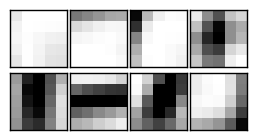

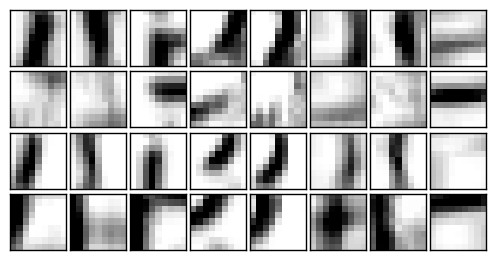

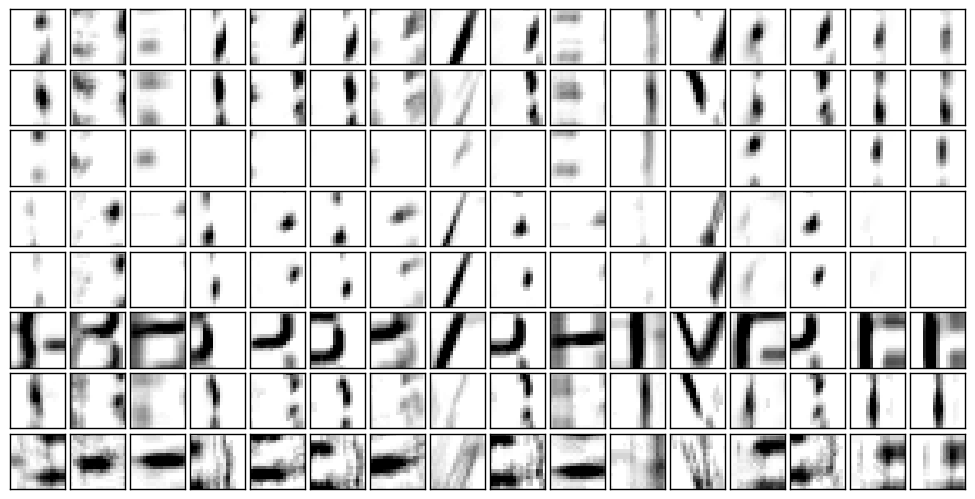

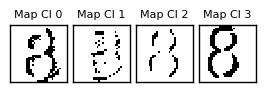

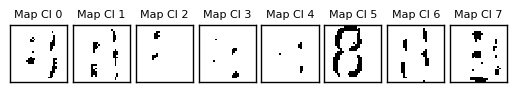

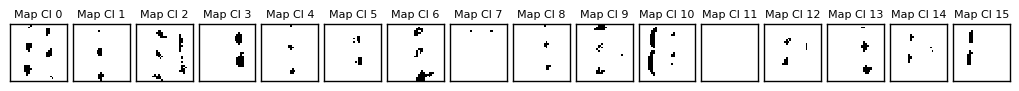

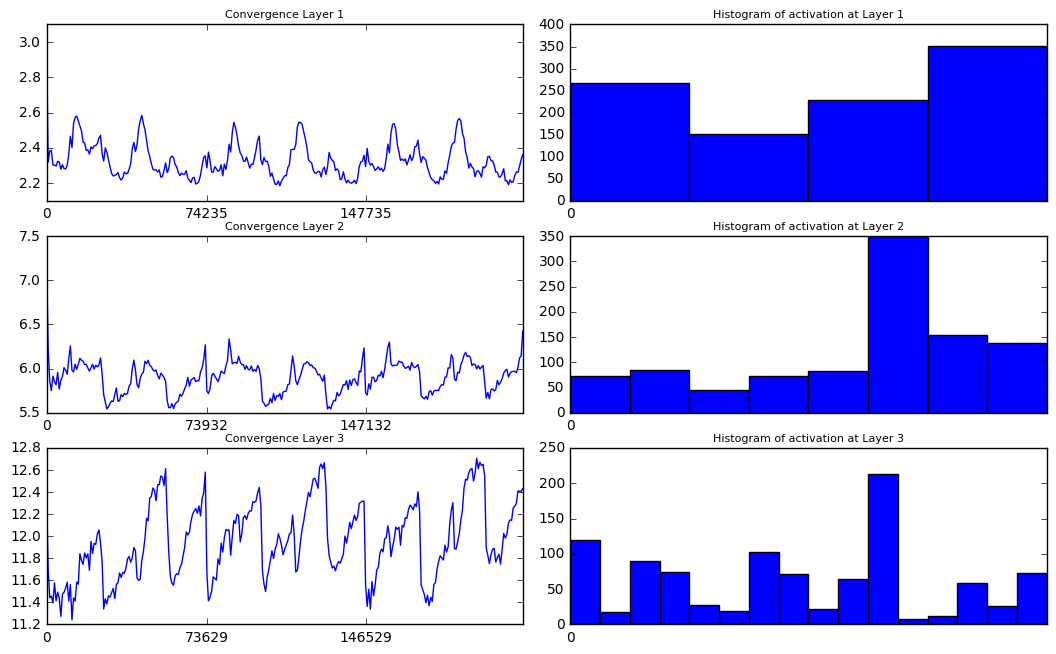

In [11]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0])
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1])
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2])
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer,to_display=['error','histo'])

## 4.2 Exp4 : Lagorce Kmeans + Exp Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [12]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path=DataPath, LabelPath=LabelPath,
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = False, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='exponential')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='exponential')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='lagorce',kernel='exponential')
Net = Network([L1,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,NbClusterList=nb_cluster,
                                                 to_record=True, NbCycle=3)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_01_LagorceKmeans/Exp4_2017_11_17.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_01_LagorceKmeans/Exp4_2017_11_17.pkl')
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:95.0% ### normalized:92.5% ### euclidian:92.5% ### 


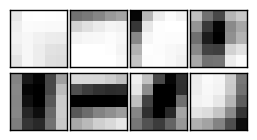

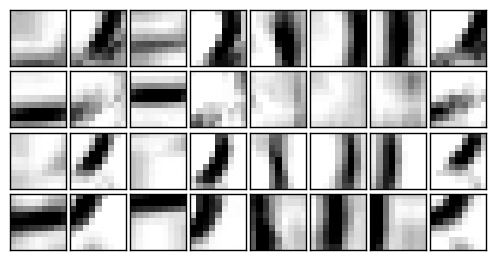

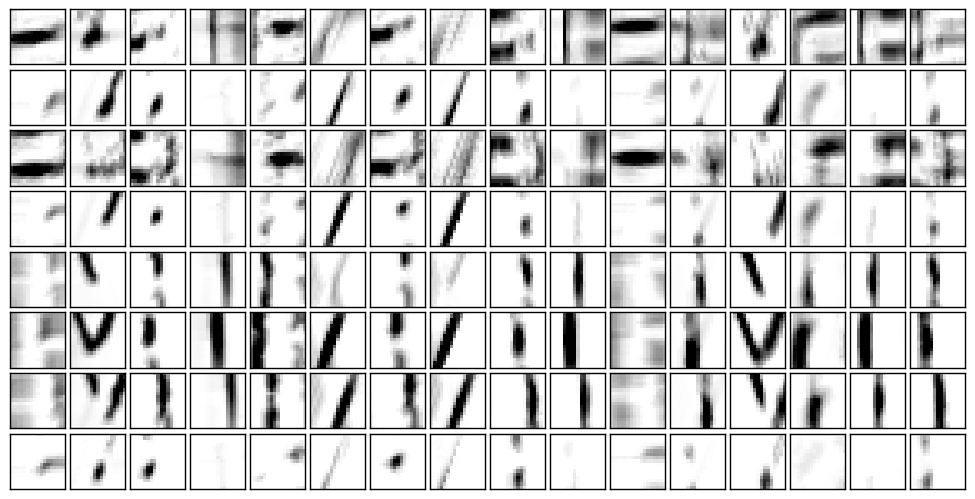

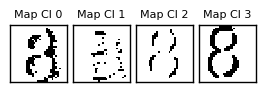

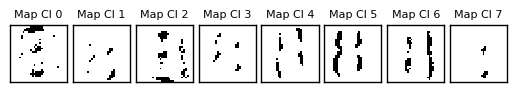

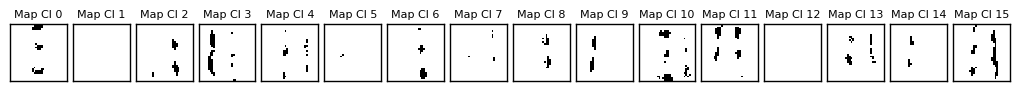

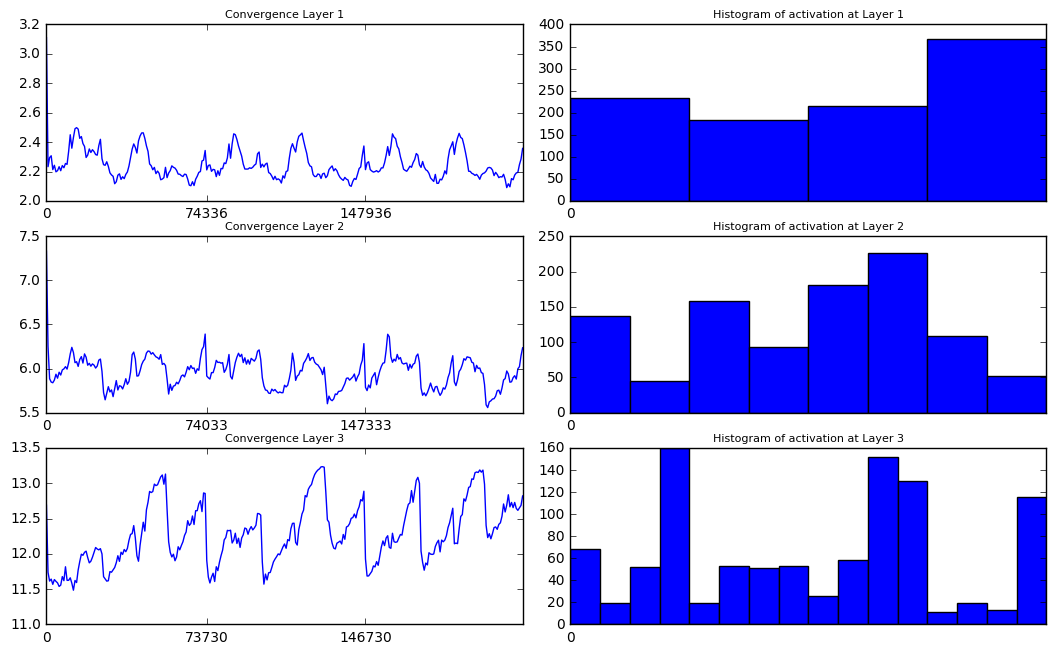

In [13]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0])
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1])
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2])
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer,to_display=['error','histo'])